In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
'''from zipfile import ZipFile
with ZipFile('../AmesHousing.zip') as zf:
    zf.extractall()'''

"from zipfile import ZipFile\nwith ZipFile('../AmesHousing.zip') as zf:\n    zf.extractall()"

In [63]:
df = pd.read_csv('AmesHousing.csv')
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [66]:
df.shape

(2930, 82)

In [67]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_rows", None)  # Show all rows
df.isnull().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [68]:
df.shape[0]

2930

In [69]:
#Check for the percentage fo null values, if its goes beyond 30 percent, drop the feature
for col in df.columns:
    percentageOfNullData =df[col].isnull().sum()/df.shape[0]
    if percentageOfNullData*100 > 30:
        print(f"{percentageOfNullData*100} is null for this {col} featue")
        df.drop(columns=[col],inplace=True,axis=1)


93.24232081911262 is null for this Alley featue
60.580204778157 is null for this Mas Vnr Type featue
48.532423208191126 is null for this Fireplace Qu featue


99.55631399317406 is null for this Pool QC featue
80.4778156996587 is null for this Fence featue
96.38225255972696 is null for this Misc Feature featue


In [70]:
df.shape

(2930, 76)

In [71]:
#Check for the percentage fo null values, if its goes beyond 30 percent, drop the feature
for col in df.columns:
    percentageOfNullData =df[col].isnull().sum()/df.shape[0]
    if percentageOfNullData*100 > 0:
        print(f"{percentageOfNullData*100} is null for this {col} featue")
       # df.drop(columns=[col],inplace=True,axis=1)

16.723549488054605 is null for this Lot Frontage featue
0.7849829351535836 is null for this Mas Vnr Area featue
2.7303754266211606 is null for this Bsmt Qual featue


2.7303754266211606 is null for this Bsmt Cond featue
2.832764505119454 is null for this Bsmt Exposure featue
2.7303754266211606 is null for this BsmtFin Type 1 featue
0.034129692832764506 is null for this BsmtFin SF 1 featue
2.7645051194539247 is null for this BsmtFin Type 2 featue
0.034129692832764506 is null for this BsmtFin SF 2 featue
0.034129692832764506 is null for this Bsmt Unf SF featue
0.034129692832764506 is null for this Total Bsmt SF featue
0.034129692832764506 is null for this Electrical featue
0.06825938566552901 is null for this Bsmt Full Bath featue
0.06825938566552901 is null for this Bsmt Half Bath featue
5.3583617747440275 is null for this Garage Type featue
5.426621160409556 is null for this Garage Yr Blt featue
5.426621160409556 is null for this Garage Finish featue
0.034129692832764506 is null for this Garage Cars featue
0.034129692832764506 is null for this Garage Area featue
5.426621160409556 is null for this Garage Qual featue
5.426621160409556 is null for this

In [72]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

In [73]:
missing_data_cols=[]
for col in df.columns:
    percentageOfNullData =df[col].isnull().sum()/df.shape[0]
    if percentageOfNullData*100 > 0:
        #print(f"{percentageOfNullData*100} is null for this {col} featue, type is {df[col].dtype}")
        missing_data_cols.append(col)
        if df[col].dtype == 'float64':
            df[col]=df[col].fillna(df[col].mean())
           # print(f' {col} is of type Float data - {df[col].dtype}')
        else:
            df[col]=df[col].fillna(df[col].mode()[0])
           # print(f' {col}  is of type Object data.- {df[col].dtype}')
        
        #df.drop(columns=[col],inplace=True,axis=1)

In [74]:
plt.figure(figsize=(20,20))
df[missing_data_cols].hist()

array([[<Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Mas Vnr Area'}>,
        <Axes: title={'center': 'BsmtFin SF 1'}>],
       [<Axes: title={'center': 'BsmtFin SF 2'}>,
        <Axes: title={'center': 'Bsmt Unf SF'}>,
        <Axes: title={'center': 'Total Bsmt SF'}>],
       [<Axes: title={'center': 'Bsmt Full Bath'}>,
        <Axes: title={'center': 'Bsmt Half Bath'}>,
        <Axes: title={'center': 'Garage Yr Blt'}>],
       [<Axes: title={'center': 'Garage Cars'}>,
        <Axes: title={'center': 'Garage Area'}>, <Axes: >]], dtype=object)

<Figure size 2000x2000 with 0 Axes>

In [75]:
df[missing_data_cols].isnull().sum()

Lot Frontage      0
Mas Vnr Area      0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Electrical        0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
dtype: int64

In [76]:
num_df = df[missing_data_cols].select_dtypes(include=['number'])
num_df_corr = num_df.corr()
sns.heatmap(num_df_corr,cmap='coolwarm',fmt='.2f',annot=True)
upper_tri = np.where(np.triu(np.ones(num_df_corr.shape),k=1).astype(bool))
print(upper_tri)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9], dtype=int64), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  2,  3,  4,  5,  6,  7,  8,
        9, 10,  3,  4,  5,  6,  7,  8,  9, 10,  4,  5,  6,  7,  8,  9, 10,
        5,  6,  7,  8,  9, 10,  6,  7,  8,  9, 10,  7,  8,  9, 10,  8,  9,
       10,  9, 10, 10], dtype=int64))


In [77]:
num_df = df.select_dtypes(include=['number'])
num_df_corr = num_df.corr()
sns.heatmap(num_df_corr,cmap='coolwarm',cbar=False)

<Axes: >

In [78]:
num_df_corr=num_df_corr.abs()
upper_tri = num_df_corr.where(np.triu(np.ones(num_df_corr.shape),k=1).astype(bool))

threshold = 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
to_drop


['1st Flr SF', 'TotRms AbvGrd', 'Garage Area', 'Yr Sold']

In [79]:
for column in to_drop:
    high_corr = upper_tri.index[upper_tri[column] > threshold].tolist()
    print(f"{column} is highly correlated with {high_corr}")
df.shape

1st Flr SF is highly correlated with ['Total Bsmt SF']
TotRms AbvGrd is highly correlated with ['Gr Liv Area']
Garage Area is highly correlated with ['Garage Cars']
Yr Sold is highly correlated with ['Order']


(2930, 76)

In [80]:
df.drop(columns=to_drop,axis=1,inplace=True)
df.shape

(2930, 72)

In [81]:
df.shape[1] - num_df.shape[1] 

33

In [82]:
obj_df = df.select_dtypes(include=['object'])
obj_df.shape


(2930, 37)

In [83]:
obj_df.head()


MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
1        RH   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Corner        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2  ... Electrical Kitchen Qual  \
0        NAmes        Norm        Norm  ...      SBrkr           TA   
1        NAmes       Feedr        Norm  ...      SBrkr           TA   
2        NAmes        Norm        Norm  ...      SBrkr           Gd   
3        NAmes        Norm        Norm  ...      SBrkr           Ex   
4      Gilbert        Norm        Norm  ...      SBrkr           TA   

  Functional Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0        Typ      Attchd           Fin          TA          TA           P   
1        Typ      Attchd           Unf          TA          TA           Y   
2        Typ      Attchd           Unf          TA          TA           Y   
3        Typ      Attchd           Fin          TA          TA           Y   
4        Typ      Attchd           Fin          TA          TA           Y   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       WD          Normal  
3       WD          Normal  
4       WD          Normal  

[5 rows x 37 columns]

In [84]:
high_cardinality_cols = [col for col in df.select_dtypes(include=object) if df[col].nunique()>10]
high_cardinality_cols

['Neighborhood', 'Exterior 1st', 'Exterior 2nd']

In [85]:
df['Exterior 2nd'].unique()

array(['Plywood', 'VinylSd', 'Wd Sdng', 'BrkFace', 'CmentBd', 'HdBoard',
       'Wd Shng', 'MetalSd', 'ImStucc', 'Brk Cmn', 'AsbShng', 'Stucco',
       'AsphShn', 'CBlock', 'Stone', 'PreCast', 'Other'], dtype=object)

In [86]:
df.drop(columns=high_cardinality_cols,axis=1,inplace=True)

In [87]:
df.shape

(2930, 69)

In [88]:
plt.figure(figsize=(20,20))
df_num = df.select_dtypes(include=['number'])
df_num_corr = df_num.corr()
sns.heatmap(df_num_corr,cbar=False,cmap='coolwarm',annot=True,fmt='.2f')

<Axes: >

<Axes: xlabel='SalePrice', ylabel='Count'>

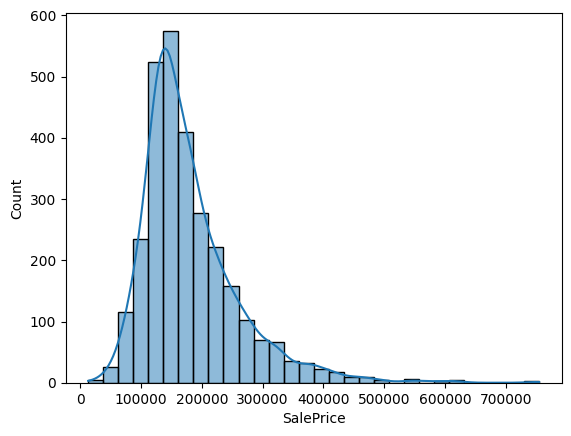

In [89]:
sns.histplot(df['SalePrice'],bins=30,kde=True)

In [90]:
df.shape

(2930, 69)

In [91]:
from sklearn.preprocessing import OrdinalEncoder
data_objects = df.select_dtypes(include=['object'])
enc  = OrdinalEncoder()

#enc.transform(df[data_objects[0]])
              


In [94]:
print(data_objects.columns[0])
#a = enc.fit(df[data_objects.columns[0]].to_numpy().reshape(-1,1))
for col in data_objects.columns:
    df[col] = enc.fit_transform(df[col].to_numpy().reshape(-1,1))
df.info()

MS Zoning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   float64
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   float64
 7   Lot Shape        2930 non-null   float64
 8   Land Contour     2930 non-null   float64
 9   Utilities        2930 non-null   float64
 10  Lot Config       2930 non-null   float64
 11  Land Slope       2930 non-null   float64
 12  Condition 1      2930 non-null   float64
 13  Condition 2      2930 non-null   float64
 14  Bldg Type        2930 non-null   float64
 15  House Style      2930 non-null   float64
 16  Overall Qual     2930 non-null   int64  
 17  Over

<Axes: >

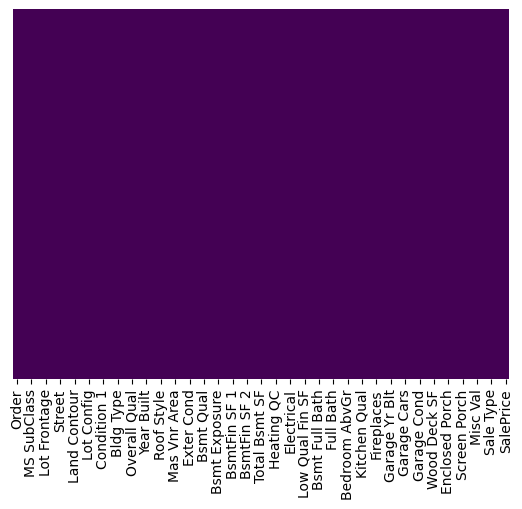

In [101]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [96]:
df_np = df.to_numpy()
X = df_np[:,:-1]
y = df_np[:,-1]


In [106]:
X.shape

(2930, 68)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [109]:
print(f"Shape of x: {X_train.shape}, Shape of Y: {y_train.shape}")

Shape of x: (2051, 68), Shape of Y: (2051,)


In [110]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
out = 